In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from IPython.core.display import display

%matplotlib inline
sns.set()
!jupyter nbextension enable --py widgetsnbextension
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### This analysis looks into finding potential benefits from the trip data from five uber bases in new york. These bases were suspended in january 2015 by the Taxi & Limousine Commission (TLC) due to uber refusing to disclose ride records data (The dataset we are currently analysing)¶. The data covers the pickup data of uber drivers operating out of the five bases from april till september 2014.

# Loading all the csv files into a pandas dataset

In [2]:
df1 = pd.read_csv('uber-raw-data-apr14.csv')
df2 = pd.read_csv('uber-raw-data-may14.csv')
df3 = pd.read_csv('uber-raw-data-jun14.csv')
df4 = pd.read_csv('uber-raw-data-jul14.csv')
df5 = pd.read_csv('uber-raw-data-aug14.csv')
df6 = pd.read_csv('uber-raw-data-sep14.csv')

# First analysing a single dataset df1

In [3]:
print(df1.head(), '\n')
print(df1.tail(), '\n')
print(df1.info(), '\n')
print(df1.shape)

          Date/Time    Lat     Lon    Base
0  4/1/2014 0:11:00 40.769 -73.955  B02512
1  4/1/2014 0:17:00 40.727 -74.034  B02512
2  4/1/2014 0:21:00 40.732 -73.987  B02512
3  4/1/2014 0:28:00 40.759 -73.978  B02512
4  4/1/2014 0:33:00 40.759 -73.972  B02512 

                 Date/Time    Lat     Lon    Base
564511  4/30/2014 23:22:00 40.764 -73.974  B02764
564512  4/30/2014 23:26:00 40.763 -73.967  B02764
564513  4/30/2014 23:31:00 40.744 -73.989  B02764
564514  4/30/2014 23:32:00 40.676 -73.941  B02764
564515  4/30/2014 23:48:00 40.688 -73.961  B02764 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB
None 

(564516, 4)


# Exporatory data analysis for a single month

# Joint exploratory analysis for the 6 months combined

In [4]:
data = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)

In [5]:
print(data.head(), '\n')
print(data.tail(), '\n')
print(data.info(), '\n')
print(data.shape, '\n')
print(data.columns)

          Date/Time    Lat     Lon    Base
0  4/1/2014 0:11:00 40.769 -73.955  B02512
1  4/1/2014 0:17:00 40.727 -74.034  B02512
2  4/1/2014 0:21:00 40.732 -73.987  B02512
3  4/1/2014 0:28:00 40.759 -73.978  B02512
4  4/1/2014 0:33:00 40.759 -73.972  B02512 

                  Date/Time    Lat     Lon    Base
4534322  9/30/2014 22:57:00 40.767 -73.984  B02764
4534323  9/30/2014 22:57:00 40.691 -74.177  B02764
4534324  9/30/2014 22:58:00 40.852 -73.932  B02764
4534325  9/30/2014 22:58:00 40.708 -74.007  B02764
4534326  9/30/2014 22:58:00 40.714 -73.950  B02764 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB
None 

(4534327, 4) 

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')


# Feature Engineering

In [6]:
# turning Date/Time column into a date time object

data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [7]:
# Create new columns from the datetime column

data['Day'] = data['Date/Time'].dt.day
data['Month'] = data['Date/Time'].dt.month
data['Time'] = data['Date/Time'].dt.time
data['Hour'] = data['Date/Time'].dt.hour
data['Date'] = data['Date/Time'].dt.date
data['DayofWeek'] = data['Date/Time'].dt.day_name()

In [8]:
data = data.reindex(columns=['Date/Time', 'Date', 'Month', 'Day', 'DayofWeek', 'Time', 'Hour', 'Lat', 'Lon', 'Base'], )

In [9]:
data['DayofWeek'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [10]:
data.head()

,Date/Time,Date,Month,Day,DayofWeek,Time,Hour,Lat,Lon,Base
0,2014-04-01 00:11:00,2014-04-01,4,1,Tuesday,00:11:00,0,40.769,-73.955,B02512
1,2014-04-01 00:17:00,2014-04-01,4,1,Tuesday,00:17:00,0,40.727,-74.034,B02512
2,2014-04-01 00:21:00,2014-04-01,4,1,Tuesday,00:21:00,0,40.732,-73.987,B02512
3,2014-04-01 00:28:00,2014-04-01,4,1,Tuesday,00:28:00,0,40.759,-73.978,B02512
4,2014-04-01 00:33:00,2014-04-01,4,1,Tuesday,00:33:00,0,40.759,-73.972,B02512


In [11]:
# Indentifying the number of uber bases in new york present in this data set
code_names = ['Unter', 'Hinter', 'Weiter', 'Schmecken', 'Danach-NY']
uber_bases = list(data['Base'].unique())
uber_bases

['B02512', 'B02598', 'B02617', 'B02682', 'B02764']

## According to our dataset, there are 5 different uber bases in the new york

In [12]:
# identifying the total pickups for each bases from april to september
total_pickups = []
for base in uber_bases:
    check = data[data['Base']==base]['Base'].count()
    total_pickups.append({base:check})
print(total_pickups)

[{'B02512': 205673}, {'B02598': 1393113}, {'B02617': 1458853}, {'B02682': 1212789}, {'B02764': 263899}]


## The total number of pickups from the month of april to september 2014 are
- B02512 had 205673 pickups
- B02598 had 1393113 pickups
- B02617 had 1458853 pickups
- B02682 had 1212789 pickups
- B02764 had 263899 pickups

## There is a huge difference in the number of pickups made by vehicles from 3 bases (B02598, B02617 and B02682) and the remaining 2 bases (B02512 and B02764). There is also a difference of over 60000 pickups between the 3 bases that recorded the highest pickups. we would be investigating the reasons why 

## Comparing the number of pickups across different categories

(array([30876., 25265., 24295., 20603., 19034., 18199., 14871., 14354.,
        12282., 11040., 10899., 10031., 11643., 10942., 11327., 12078.,
        11723., 12960., 12835., 13213., 15212., 16124., 19165., 22901.,
        22512., 28628., 32208., 36124., 40578., 42263., 48721., 47339.,
        44313., 49413., 46880., 48990., 42096., 38640., 41090., 37744.,
        36742., 37700., 36282., 39583., 38409., 37674., 42309., 38172.,
        41408., 38323., 39399., 41574., 40264., 43255., 43440., 44668.,
        49320., 47026., 53765., 52141., 53495., 59720., 58590., 61116.,
        67577., 67038., 75749., 71463., 71810., 79236., 76247., 85805.,
        77733., 77826., 83753., 78980., 83198., 74490., 72816., 75673.,
        69980., 66683., 73064., 67398., 71616., 65208., 65951., 72745.,
        66559., 70421., 64885., 63820., 64789., 57261., 57772., 50914.,
        45959., 43797., 36969., 35356.]),
 array([    0. ,   863.4,  1726.8,  2590.2,  3453.6,  4317. ,  5180.4,
         6043.8,  6907.

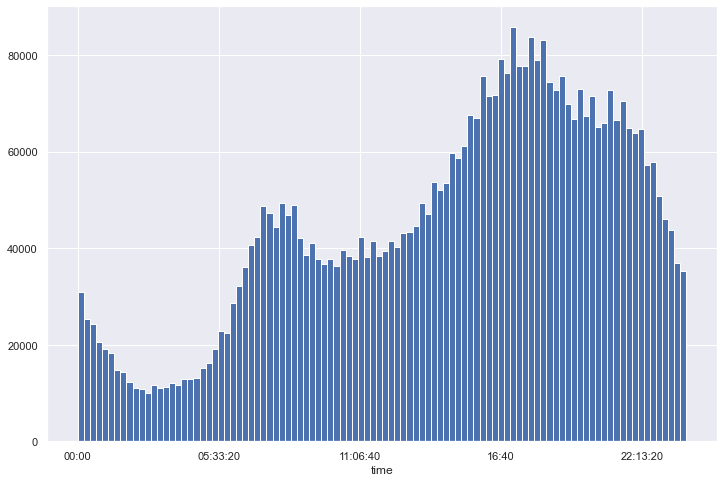

In [13]:
# Comparing the total number of pickups across different times of the day

plt.figure(figsize=(12, 8))
plt.hist(data['Time'], bins=100)

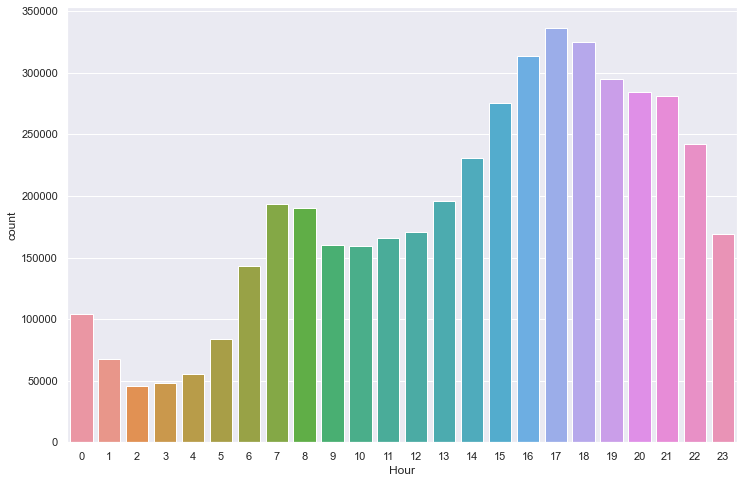

In [14]:
# per hour

plt.figure(figsize=(12, 8))
sns.countplot(data['Hour'])

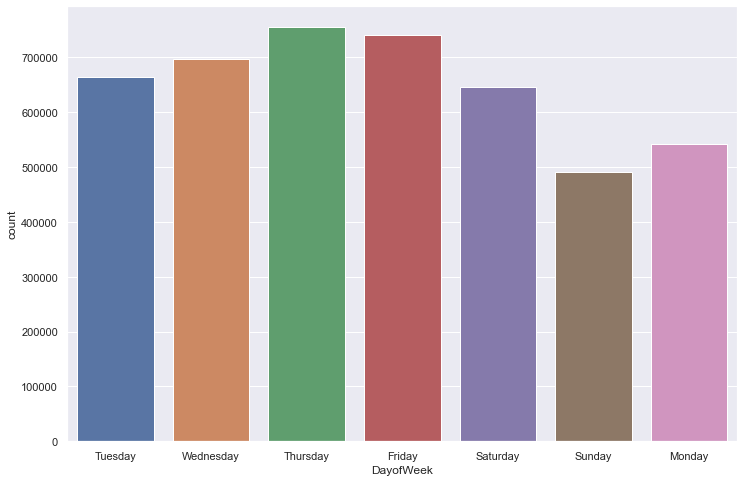

In [15]:
# total count of pickups in a day

plt.figure(figsize=(12, 8))
sns.countplot(data['DayofWeek'])

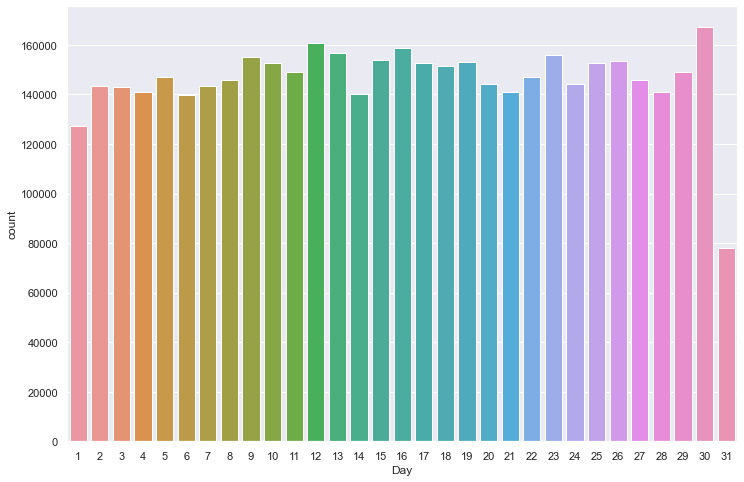

In [16]:
# total count of pickups each day in a month

plt.figure(figsize=(12, 8))
sns.countplot(data['Day'])

## We can infer from the two histogram plots above that

- The number of pickups are at it lowest by 2am (below 5000 pickups) which point towards the fact that most people are indoors
- It increases slowly until it gets to 5am
- From 5pm the number of pickups soars until it peaks around 7am (morning rush hour)
- We starts to see the numbers drop from 7am till 10am
- It starts to incease after 10am, surpassing the earlier peak at 7am by 3pm 
- The number of pick-ups reaches the global peak between 5 and 6pm and this point toward the fact that most offices close by this time and a lot of people are outside trying to get home (evening rush hour)
- The number drops steadily until 10pm after which its decreases sharply till 2am
- Thursday is the day with the total number of pickups (probably because it is the day with the least traffic), followed by friday, wednesday, tuesday, saturday, monday and sunday.
- Sunday is the day with the least pickups and understandably so as it is the day most people stay at home.
- Monday is the day with the second smallest number of pickups due to heavy traffic and people prefer taking faster means of transportation like the subway trains 

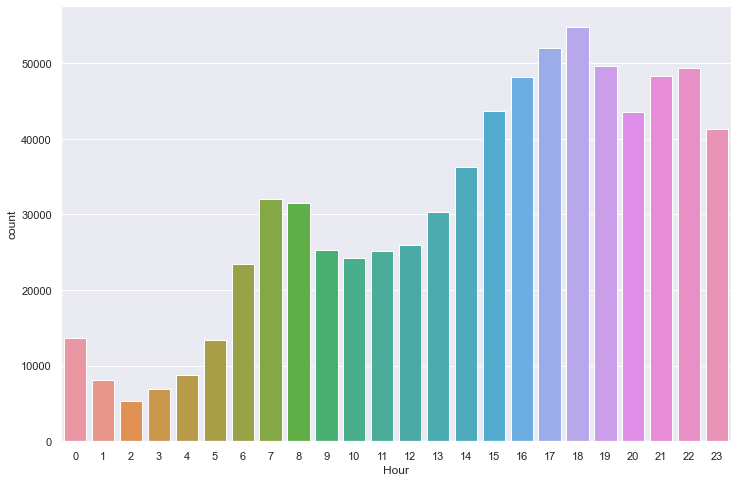

In [17]:
# Pickups on Friday

plt.figure(figsize=(12, 8))
sns.countplot(data[data['DayofWeek']=='Friday']['Hour'])

## Noted Points of interest  using domain knowledge includes
- morning rush hour peak (7am)
- evening rush hour peak (5pm)
- infered time when most newyorkers are likely to be asleep (2am)
- infered time when most newyorkers are likely wake up (between 4am and 6am)
- infered time during which most newyorkers likely to be indoors (as from 11pm)
- New-york's active night life period is between 9pm and 1am (with peak hours at 9 and 10pm)
- Infered period during which people resume at their various offices (between 7am and 9am)
- Infered period during which people close at their different offices (between 4 and 7pm)

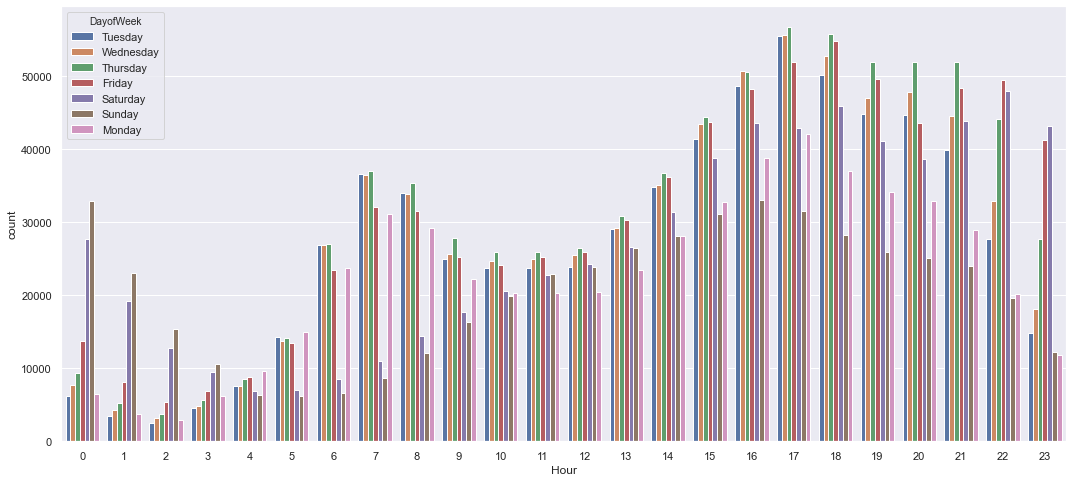

In [18]:
# Checking number of uber pickups hourly, categorised by the day of the week

plt.figure(figsize=(18, 8))
sns.countplot(x=data['Hour'], data=data, hue='DayofWeek')

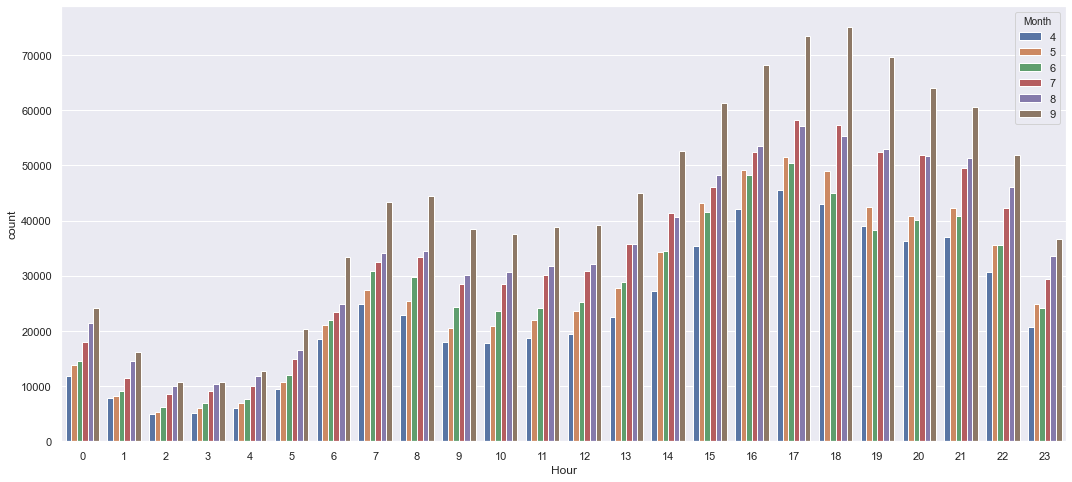

In [19]:
# Checking if the trends varies across each month

plt.figure(figsize=(18, 8))
sns.countplot(x=data['Hour'], data=data, hue='Month')

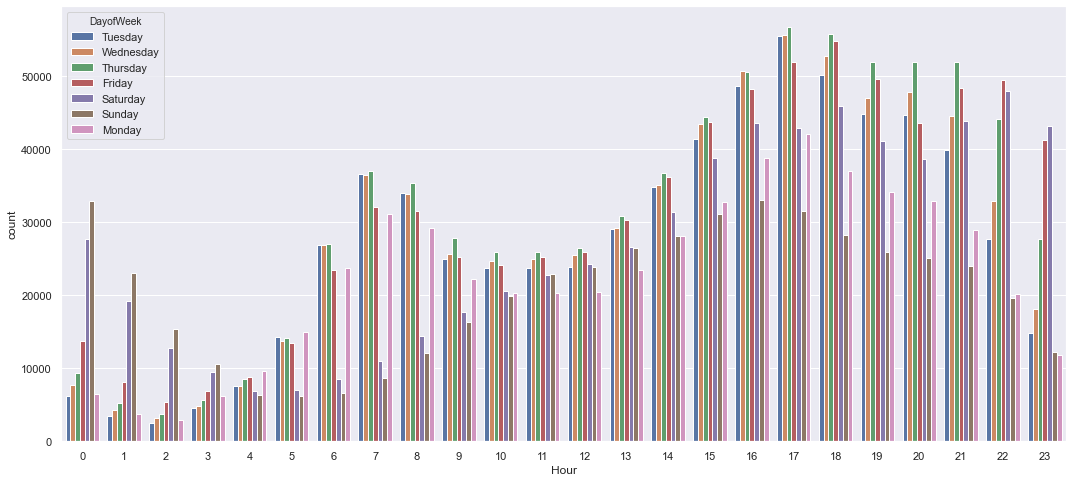

In [20]:
# Checking if the trends varies across each day of the week

plt.figure(figsize=(18, 8))
sns.countplot(x=data['Hour'], data=data, hue='DayofWeek')

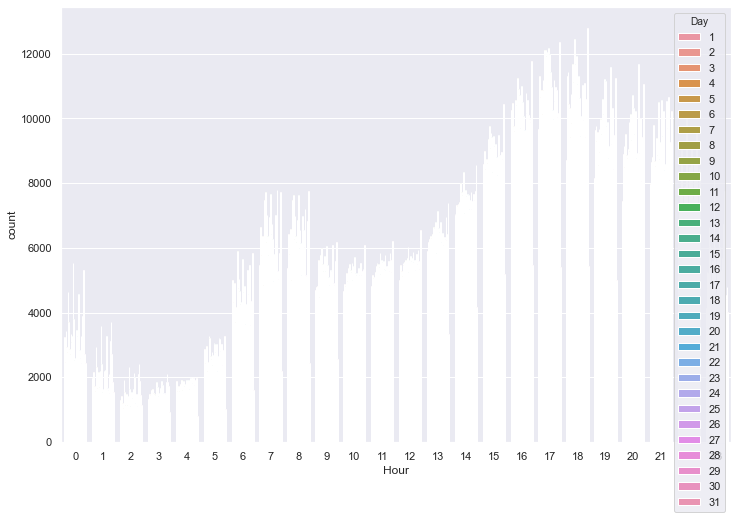

In [21]:
# Checking if the trends varies across each day

plt.figure(figsize=(12, 8))
sns.countplot(x=data['Hour'], data=data, hue='Day')

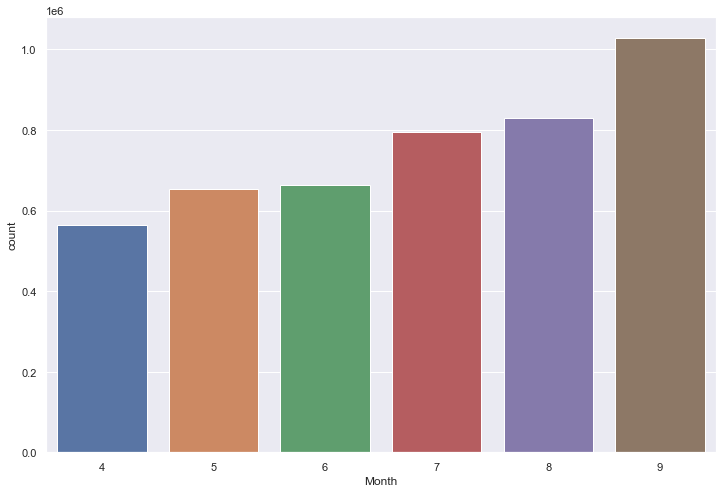

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data['Month'])

## From the charts above the points noted in 5.6 is maintained across all 6 months used in this data set. however, there are slights various in demand across these months
- generally the total pickups made increases each month during the specified time period (April to September)
- april showed the lowest number of pickups made while September showed the highest number of pickups
- A trend from april to september is that temperatures increases, and the warmer the temperature the higher probability that people would go outdoors. This trend is reflected in chart above

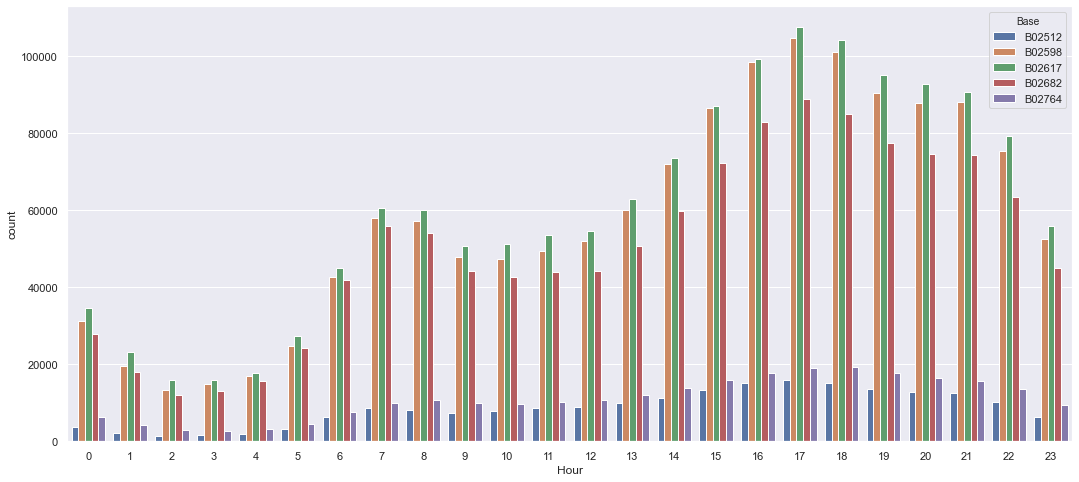

In [23]:
# Checking if the trends varies across each Base

plt.figure(figsize=(18, 8))
sns.countplot(x=data['Hour'], data=data, hue='Base')

# The number of pickups in an entire day for the 6 months varies for each base
- B02598, B02617 and B02682 have high numbers consitently compared to the low numbers recorded by B02512, B02764
- the tally for the bases in decending number is B02617, B02598, B02682, B02764, B02512
- The base with the highest pickups is B02617 and B02512 has the lowest pickups

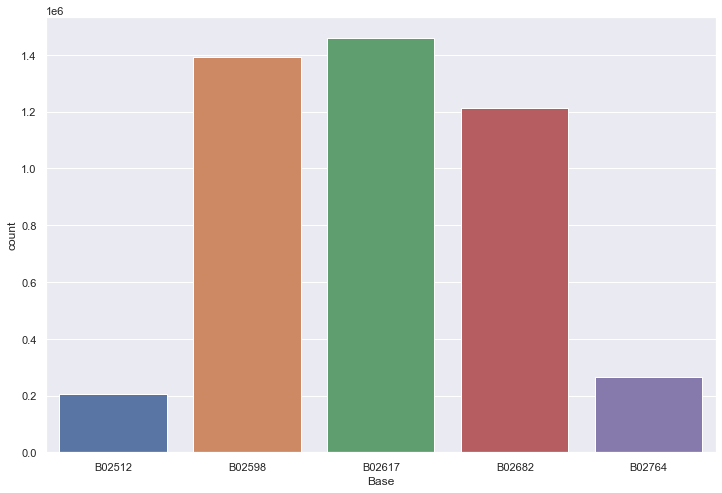

In [24]:
# Comparing total pickups in each base

plt.figure(figsize=(12, 8))
sns.countplot(x=data['Base'])

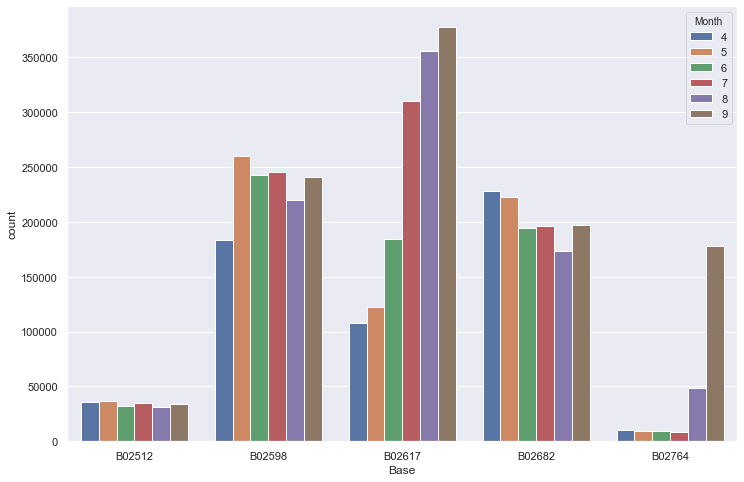

In [25]:
# checking the total pickups for each base for each month

plt.figure(figsize=(12, 8))
sns.countplot(x=data['Base'], data=data, hue='Month')

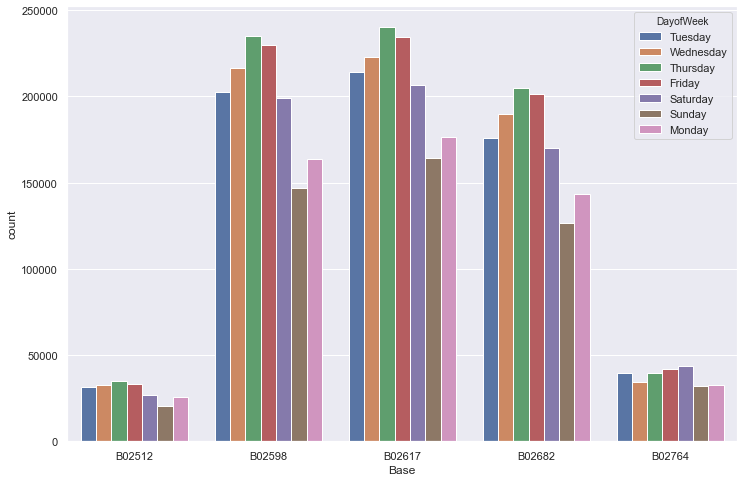

In [26]:
# checking the total pickups for each base for day of the week

plt.figure(figsize=(12, 8))
sns.countplot(x=data['Base'], data=data, hue='DayofWeek')

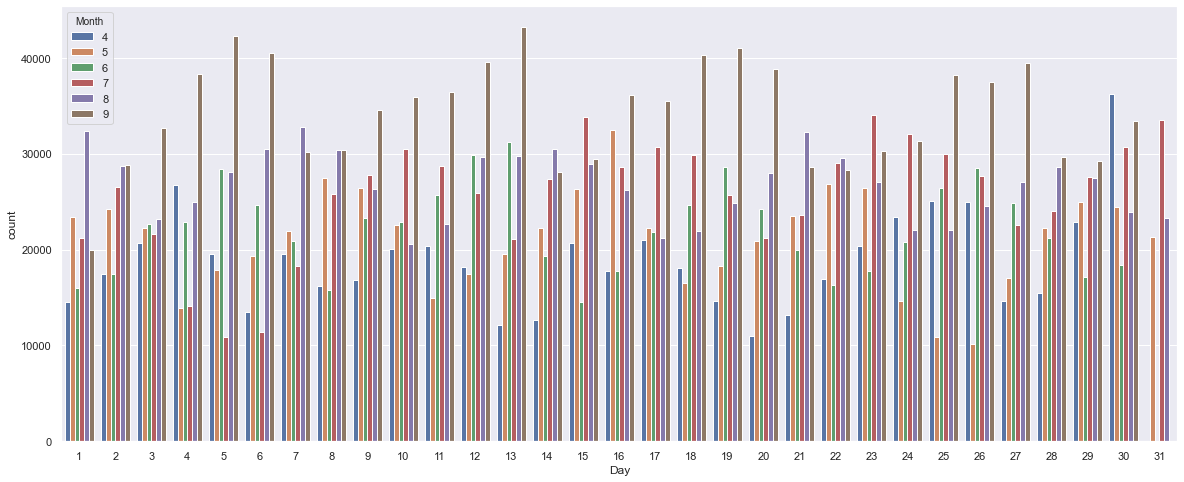

In [27]:
# trips per day in a month for each month

plt.figure(figsize=(20, 8))
sns.countplot(x=data['Day'], data=data, hue='Month')

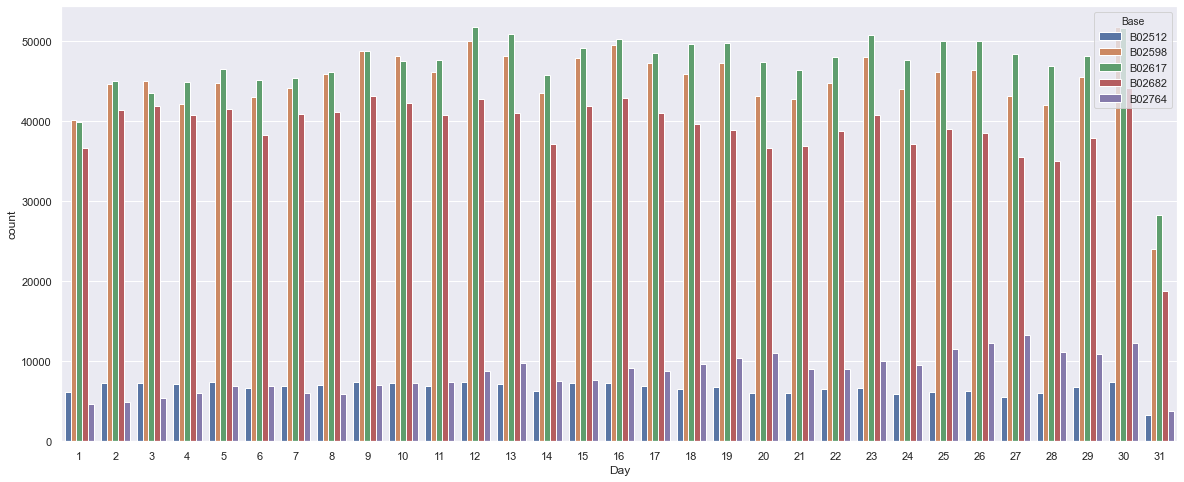

In [28]:
# trips per day in a month for each base

plt.figure(figsize=(20, 8))
sns.countplot(x=data['Day'], data=data, hue='Base')

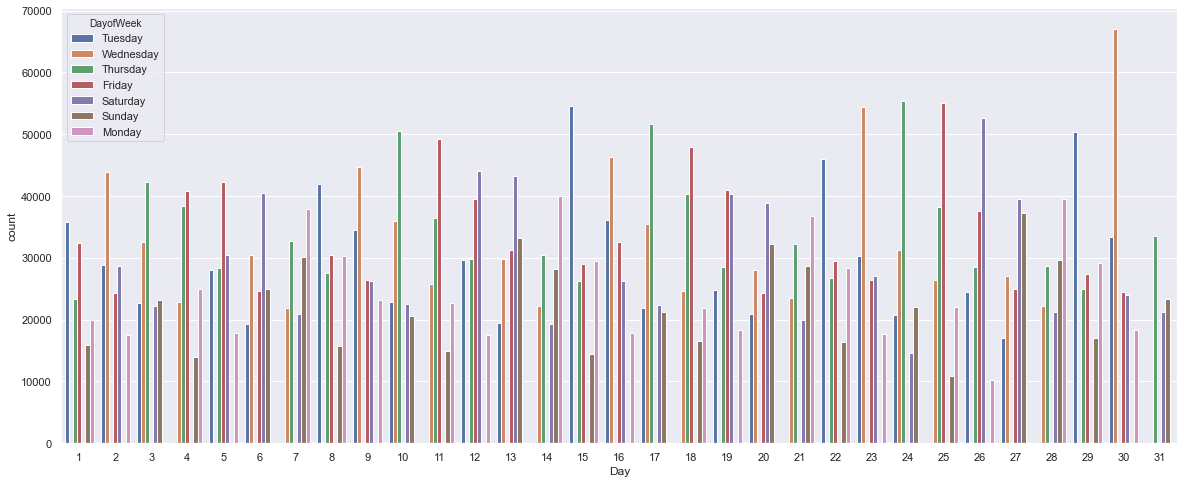

In [29]:
# trips per day in a month for each day of the week

plt.figure(figsize=(20, 8))
sns.countplot(x=data['Day'], data=data, hue='DayofWeek')

### Points to Note
- Only Base B02617 showed an increase in the number of pickups from April to September, the others did not.


# Things we need to further investigate
- why only Base 02617 reflected the trend we observed in header 5.7
- Investigate the reason bases B02512 and B02764 has low pickups compared to the other bases
- Also the reason why Bases B02617, B02598 and B02682 had high pickup rates
- verify that uber drivers are not discriminating against "certain neighbourhoods" or "disabled passengers", that uber is weeding out drivers who do.
- discover how this data could potentially help transportation planners analyze people's travel routes and handle traffic flow in the cities.

# Things to consider 
- physical operating area for each base (map/boundaries)
- most popular pickup location by drivers of each base
- least popular pick up location by drivers of each base
- Knowledge of New York (traffic hotspots, busy districts, densly populated areas

Other points to consider
- Number of pickups at controversial neighbourhoods
- Number of pickups at places where disables passengers are commonly found
- Number of cars registered in each base, the type of uber car for instace, Uber X (no access to data)


In [20]:
code_names

['Unter', 'Hinter', 'Weiter', 'Schmecken', 'Danach-NY']

# Working with longitude and latitude - Creating a GeoPandas DataFrame

In [13]:
# importing the needed libraries

import geopandas as gpd
from shapely.geometry import Point, Polygon

# create a map variable (using the new york city map .shp file)

newyork_map = gpd.read_file('geo_export_80a40b1e-1219-4886-b242-b7567e486479.dbf')

In [14]:
newyork_map

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186613e+09,462958.559564,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,6.366027e+08,361212.477841,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934091e+09,729593.057284,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
4,4.0,Queens,3.044042e+09,899490.723339,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [15]:
# creating a geopandas data frame

crs = "EPSG:4326"

geometry = [Point(xy) for xy in zip(data['Lon'], data['Lat'])]

geodf = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

In [16]:
newyork_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
geodf.head()

,Date/Time,Date,Month,Day,DayofWeek,Time,Hour,Lat,Lon,Base,geometry
0,2014-04-01 00:11:00,2014-04-01,4,1,Tuesday,00:11:00,0,40.7690,-73.9549,B02512,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,2014-04-01,4,1,Tuesday,00:17:00,0,40.7267,-74.0345,B02512,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,2014-04-01,4,1,Tuesday,00:21:00,0,40.7316,-73.9873,B02512,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,2014-04-01,4,1,Tuesday,00:28:00,0,40.7588,-73.9776,B02512,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,2014-04-01,4,1,Tuesday,00:33:00,0,40.7594,-73.9722,B02512,POINT (-73.97220 40.75940)


# Identifying the points on the map of new york city

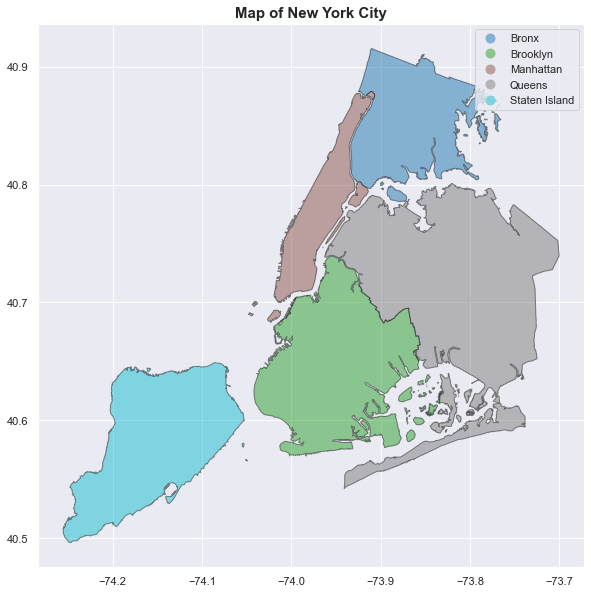

In [18]:
newyork_map.plot(column='boro_name', legend=True, figsize=(10,10), alpha=0.5, edgecolor='k')
plt.title('Map of New York City', fontsize=15, fontweight='bold')
plt.show()

# Add background tiles to map

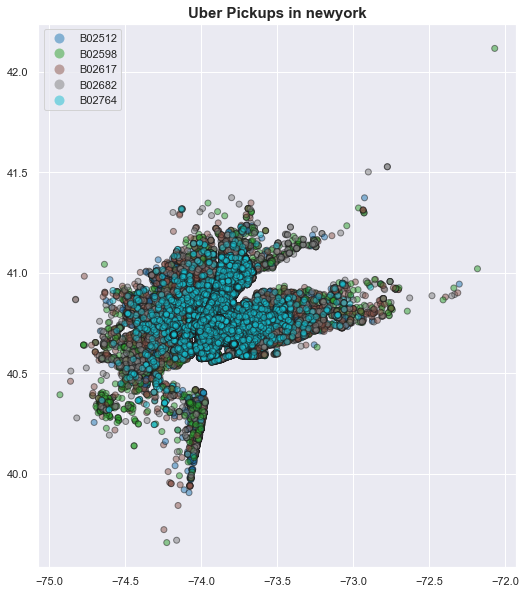

In [21]:
geodf.plot(column='Base', legend=True, figsize=(10,10), alpha=0.5, edgecolor='k')
plt.title('Uber Pickups in newyork', fontsize=15, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Map of New York Showing Uber Pick-Ups categorised by Bases from April till September 2014')

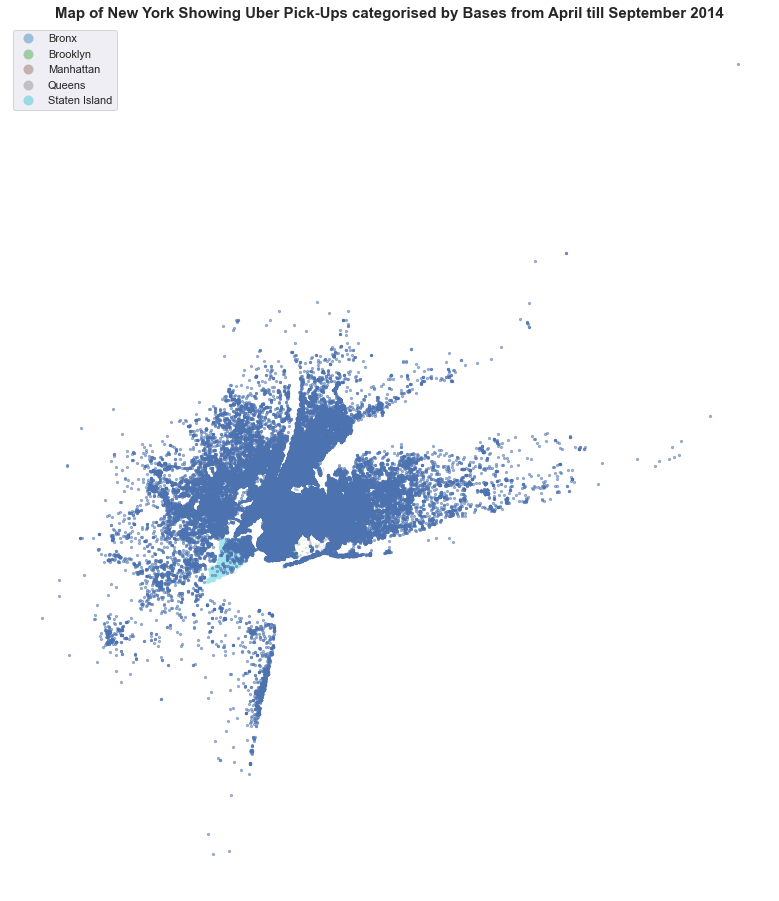

In [22]:
# plot
fig, axes = plt.subplots(figsize=(16, 16))

newyork_map.plot(ax=axes, alpha=0.4, column='boro_name', legend=True)

# 
geodf.plot(ax=axes, markersize=5, alpha=0.5)
_ = axes.axis('off')

plt.title('Map of New York Showing Uber Pick-Ups categorised by Bases from April till September 2014', fontsize=15, fontweight='bold')

# plt.savefig('Map_of_New_York_showing_uber_pickups_with_identified_bases.png')

In [ ]:
points_on_map = gpd.overlay(newyork_map, geodf, how='intersection')
points_on_map.plot(figsize=(10, 10))

# Dont Run

In [ ]:
from mpl_toolkits.basemap import Basemap
west, south, east, north = -74.26, 40.50, -73.70, 40.92
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='f')

x, y = m(geodf['Lon'].values, geodf['Lat'].values)

m.hexbin(x, y, gridsize=1000,bins='log', cmap='YlOrRd_r')

In [ ]:
#import necessary libraries
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
#Most of this code is from Geoff Boeing article and GitHub repo. 
#If you get lost, read through it and it will explain way better than I could ever do!
#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/


def get_hot_spots(max_distance,min_cars,ride_data):
    
    ## get coordinates from ride data
    coords = ride_data[['Lat', 'Lon']].to_numpy()
    
    ## calculate epsilon parameter using
    ## the user defined distance
    kms_per_radian = 6371.0088
    ##The epsilon parameter is the max distance that points can be from each other to be considered a cluster.
    epsilon = max_distance / kms_per_radian
    
    ## perform clustering
    db = DBSCAN(eps=epsilon, min_samples=min_cars,
                algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    
    ## group the clusters
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
    ## report
    print('Number of clusters: {}'.format(num_clusters))
    
    ## initialize lists for hot spots
    lat = []
    lon = []
    num_members = []
    
    ## loop through clusters and get centroids, number of members
    for ii in range(len(clusters)):
## filter empty clusters
        if clusters[ii].any():
## get centroid and magnitude of cluster
            lat.append(MultiPoint(clusters[ii]).centroid.x)
            lon.append(MultiPoint(clusters[ii]).centroid.y)
            num_members.append(len(clusters[ii]))
            
    hot_spots = [lon,lat,num_members]
    
    return hot_spots

In [ ]:
uber_data = geodf.loc[(geodf['Day']==21) & (geodf['Hour']> 15)]

max_distance = 0.05

min_pickups = 25

hot_spots = get_hot_spots(max_distance, min_pickups, uber_data)

In [86]:
from IPython.display import IFrame
from IPython.core.display import display

import mplleaflet
## make the figure
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
## set the color scale
color_scale = np.log(hot_spots[2])
# color_scale = hot_spots[2]
## make the scatter plot
IFrame(plt.scatter(hot_spots[0], hot_spots[1],s=80,c=color_scale,cmap='cool'),  '100%', '600px')
## display the Leaflet
# mpl.show()     # opens in a new interactive tab
mplleaflet.display()  # shows interactive map inline in Jupyter but cannot handle large data sets

C:\Users\Chizurum_Olorondu\AppData\Roaming\Python\Python37\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
